Tensores

In [ ]:
## Escalar
a = 2

## Vetor / Array
a = [ 1 , 2 ,3 ]

## Matriz / Array2D ( 2 x 3)
a = [[1,2,3],
     [4,5,6]]
# Array 3D ( 3 x 2 x 2 ) 
a = [ [[1,2],[3,4]],
      [[5,6],[7,8]]
      [[9,0],[1,2]],]

| Dimensões 	| Computação 	| Mátematica 	|
|-----------	|------------	|------------	|
|     0     	| Número     	| tensor 0d  	|
| 1         	| array      	| tensor 1d  	|
| 2         	| Array 2D   	| tensor 2d  	|
| 3         	| Array 3D   	| tensor 3d  	|
| ...       	| ...        	| ...        	|
| n         	| Array nd   	| tensor nd  	|

In [3]:
import torch
lista = [ [1,2,3],
          [4,5,6]]

tns = torch.Tensor(lista)
print(tns.dtype)
print(tns)

tns = torch.FloatTensor(lista)
print(tns.dtype)
print(tns)

tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


Outras formas de instancias tensores

In [5]:
import numpy as np

arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)

print(arr)
print(arr.dtype)
print(tns)
print(tns.dtype)

[[0.3862543  0.28501269 0.6884104  0.3819501 ]
 [0.82518934 0.43490921 0.59915661 0.86000045]
 [0.6235206  0.23116175 0.97567227 0.02956434]]
float64
tensor([[0.3863, 0.2850, 0.6884, 0.3820],
        [0.8252, 0.4349, 0.5992, 0.8600],
        [0.6235, 0.2312, 0.9757, 0.0296]], dtype=torch.float64)
torch.float64


Tensores inicializados

In [7]:
tns = torch.ones(2,3)
print(tns.dtype)
print(tns)
tns = torch.zeros(4,5)
print(tns.dtype)
print(tns)
tns = torch.rand(3,3)
print(tns.dtype)
print(tns)

torch.float32
tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.float32
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.float32
tensor([[0.5835, 0.0921, 0.6426],
        [0.1452, 0.2807, 0.2262],
        [0.9452, 0.2832, 0.1415]])


Tensor para Array Numpy

In [9]:
arr = tns.data.numpy()
print(arr.dtype)
print(arr)

float32
[[0.5835131  0.09209859 0.6426061 ]
 [0.14521116 0.28074533 0.2262451 ]
 [0.9452474  0.28319913 0.14145303]]


Indexação

In [10]:
print(tns)
tns[0,2] = -10

print('')
print(tns)


tensor([[0.5835, 0.0921, 0.6426],
        [0.1452, 0.2807, 0.2262],
        [0.9452, 0.2832, 0.1415]])

tensor([[  0.5835,   0.0921, -10.0000],
        [  0.1452,   0.2807,   0.2262],
        [  0.9452,   0.2832,   0.1415]])


Operação com tensores

In [11]:
tns1 = torch.ones(3,3)
tns2 = torch.ones(3,3)
print(tns1 + tns2)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


Função .size() e .view()

In [20]:
print(tns1.size())
print(tns2.view(9))

torch.Size([3, 3])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [21]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


#### Classificação Linear

## Equação da reta

A equação da reta é aprendida na forma $ax + by + c$, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação como $\mathbf{w_1x_1 + w_2x_2 + b}$. Ou seja, $\mathbf{w_1}$, $\mathbf{w_2}$ e $\mathbf{b}$ são os parâmetros que definem o nosso **modelo linear**, a nossa reta.

Vamos começar realizando o plot de uma reta específica:
$\mathbf{-1x_1 + 4x_2 + 0.4}$



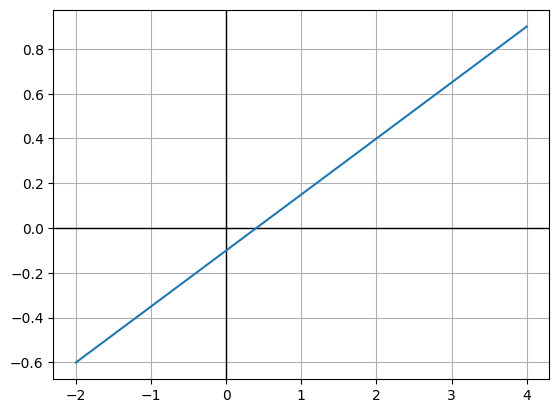

In [24]:
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

#ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a,b,c):
    x = np.linspace(-2,4,50)
    y = (-a*x -c)/b


    plt.axvline(0,-1,1,color='k',linewidth=1)
    plt.axhline(0,-2,4,color='k',linewidth=1)

    plt.plot(x,y)
    plt.grid()
plotline(a,b,c)

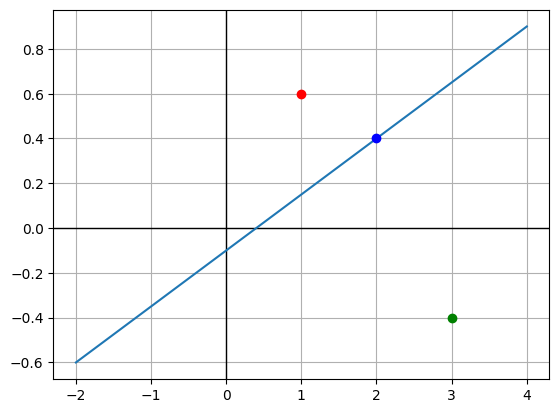

In [29]:
p1 = (2,0.4)
p2 = (1,0.6)
p3 = (3,-0.4)

plotline(a,b,c)
plt.plot(p1[0],p1[1],color='b', marker='o')
plt.plot(p2[0],p2[1],color='r', marker='o')
plt.plot(p3[0],p3[1],color='g', marker='o')

In [30]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)
ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)
ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)

0.00
1.80
-4.20


 
## Modelo Linear

Nossa reta pode ser interpretada como um modelo linear, que nada mais é do que uma **função de mapeamento** $X \rightarrow Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os parâmetros $W = \{w_1, w_2\}$ e $b$ de uma reta, é possível mapear uma entrada $X = \{x_1, x_2\}$ para a saída $f(x; W, b)$.

Para problemas de classificação, os valores de $y$ para novas entradas $x$ vão definir se $x$ é um ponto <font color='red'>acima</font> ou <font color='green'>abaixo</font> da reta, formando portanto um classificador capaz de **separar linearmente problemas com duas classes**.

<img src="https://drive.google.com/uc?export=view&id=18Emd5S0LxY_-6_oqOW_1oBztomJGuRfF" width="500">


### Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimensões $(x_1, x_2)$ nosso modelo linear tem dois **pesos** $(w_1, w_2)$ e um **viés** $b$, que em inglês são chamados de **w**eight e **b**ias. 

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente. Para um número de dimensões $d > 2$, modelos lineares são chamados de **hiperplanos**, e são compostos por:
* um peso $w_i$ para cada dimensão $x_i$. 
* um único viés $b$

Exemplo, para 3 dimensões $(x_1, x_2, x_3)$ teríamos três pesos $(w_1, w_2, w_3)$ e um único viés $b$. Sua função de mapeamento seria $y = w_1x_1 + w_2x_2 + w_3x_3 + b$
 
De forma geral, define-se que dada uma entrada com $d$ dimensões, a função de mapeamento de um modelo linear é $$y = \sum^{d}_{i=1}w_ix_i + b$$

0


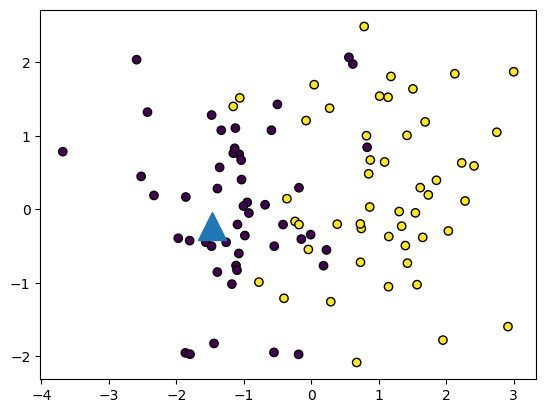

In [32]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)


plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

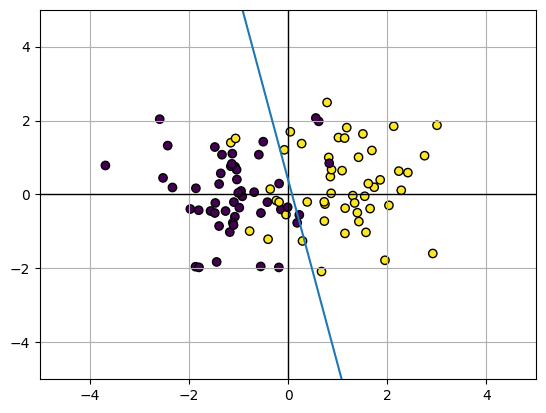

In [68]:
def plotmodel(w1,w2,b):
    np.random.seed(46)
    x = np.linspace(-2,4,50)
    y = (-w1*x -b)/w2

   

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
    plt.axvline(0,-1,1,color='k',linewidth=1)
    plt.axhline(0,-2,4,color='k',linewidth=1)

    plt.plot(x,y)
    plt.grid(True)

    plt.xlim(-5,5)
    plt.ylim(-5,5)



w1 = 5
w2 = 1
b = -0.4
plotmodel(w1,w2,b)



1 yellow


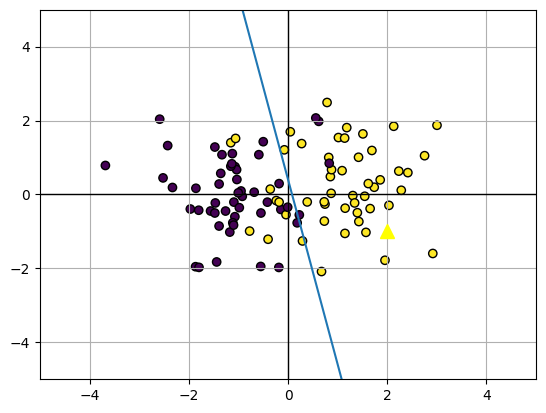

In [69]:
def classifiy(ponto,w1,w2,b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b

    if(ret >=0):
        return 1,'yellow'
    else:
        return 0,'blue'
    
p=(2,-1)
classe ,cor = classifiy(p,w1,w2,b)
print(classe,cor)
plotmodel(w1,w2,b)
plt.plot(p[0], p[1], marker="^" , color=cor,markersize=10)

In [72]:
acertos = 0
for k in range(len(X)):
  categ, _ = classifiy(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


# Camada ```Linear```

In [76]:
import torch
from torch import nn # neural networks

Agora vamos instanciar nossa camada linear, como vimos nos slides, com uma entrada de dimensionalidade ```d = 3``` e a saída de tamanho ```1```, já que estamos instanciando um perceptron simples. 

Qualquer dúvida, a documentação está logo ali ;)<br>
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear

In [77]:
torch.manual_seed(42)
#perceptron = nn.Linear(in_features=3,out_features=1)
perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Temos em mãos exatamente o mesmo modelo da imagem clássica do perceptron!

<img src="https://drive.google.com/uc?export=view&id=1Ad1nKUG8ujVWysOauKYzOhhmR26Zl6yC" width="550">

Os pesos ```W``` e o viés ```b``` são inicializados aleatoriamente pelo pytorch. Podemos consultar essa informação de duas formas:
* iterando em seus **```named_parameters```**
* acessando cada parâmetro individualmente através do seu nome padrão.

In [78]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [79]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

É importante não se esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo ```torch```. 

Para isso, usaremos aqui a biblioteca de visualização matplotlib, com o toolkit de plot 3D.<br>
Mais informações em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

Para se inspirar: https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='plasma')

In [ ]:
plot3d(perceptron)

## Forward
O fluxo da informação de entrada através da rede recebe o nome de *forward*, já que a informação é passada *para a frente*. Vamos então realizar o forward da nossa rede de um ~~homem~~ pereptron só. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada ```Linear```.

```python
# Fizemos anteriormente a instância da camada
linear = nn.Linear(in_features=3, out_features=1)

# Para realizar o forward
y = linear(X)
```

In [ ]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)

# Funções de Ativação

O módulo ```nn```, que utilizamos para criar uma camada linear, também contém as principais funções de ativação. Então vamos primeiro importar o ```torch``` e o módulo ```nn``` <br>

In [ ]:
import torch
from torch import nn

-2.8


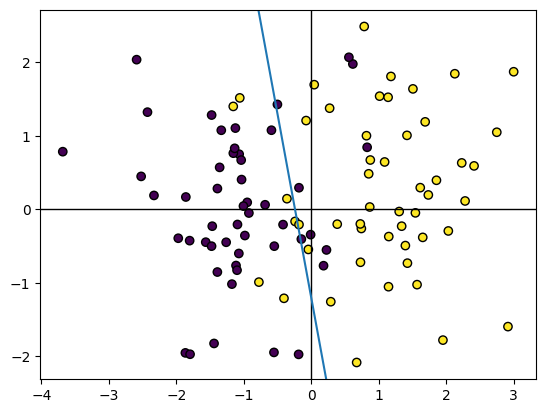

In [87]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)


w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [88]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

# w1 = 5 #a
# w2 = 1  #b
# b  = -0.4  #c
perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)



tensor([[5., 1.]])
tensor([1.2000])


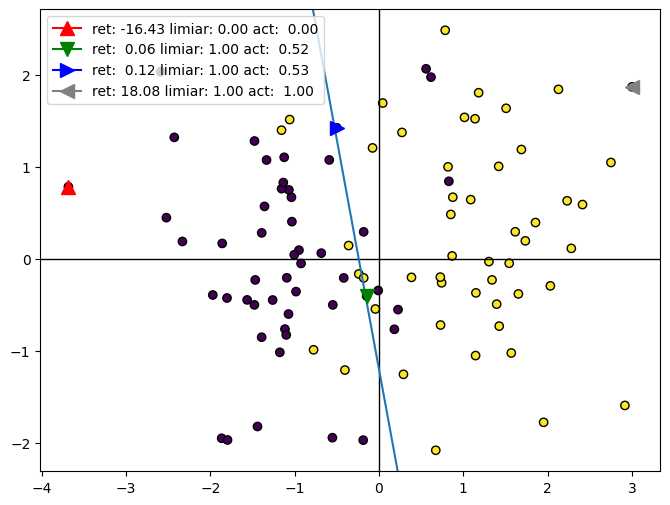

In [89]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1,w2,b)
for k,idx in enumerate([17,21,43,66]):
    x = torch.Tensor(X[idx])

    ret = perceptron(x)
    act = sigmoide(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()


## Com Tangencial

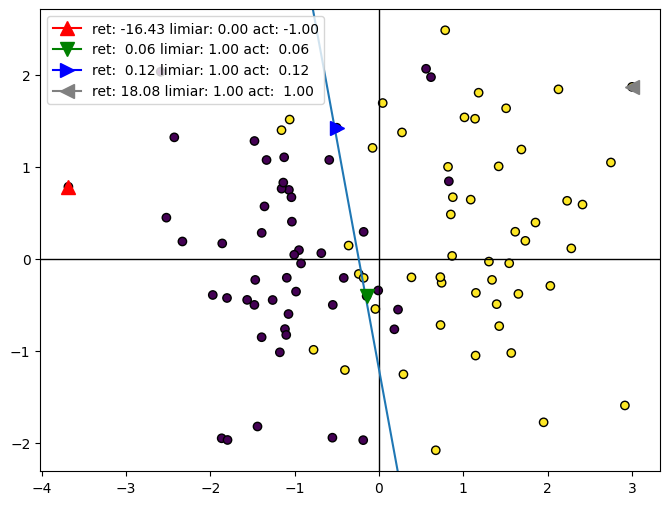

In [90]:
activation = nn.Tanh()
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1,w2,b)
for k,idx in enumerate([17,21,43,66]):
    x = torch.Tensor(X[idx])

    ret = perceptron(x)
    act = activation(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()

## Com ReLu

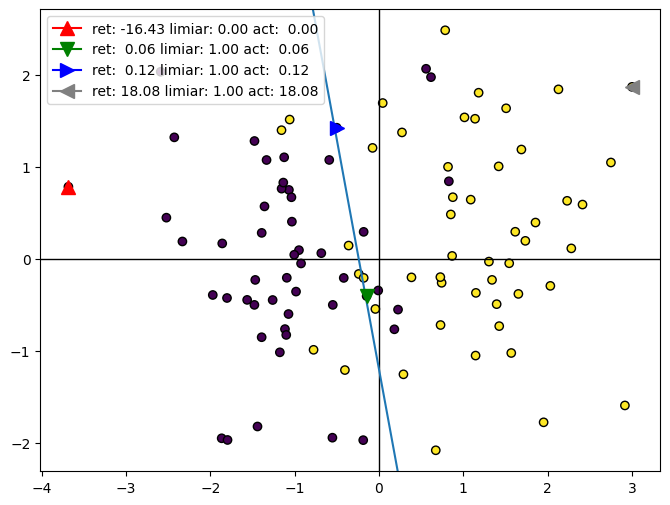

In [92]:
activation = nn.ReLU()
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1,w2,b)
for k,idx in enumerate([17,21,43,66]):
    x = torch.Tensor(X[idx])

    ret = perceptron(x)
    act = activation(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()

# Definindo uma arquitetura no pytorch

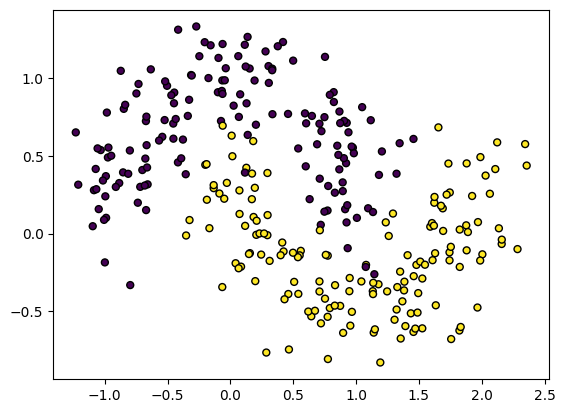

In [94]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1 , Y1 = make_moons(n_samples=300,noise=0.2)
plt.scatter(X1[:,0],X1[:,1],marker='o',c=Y1,s=25,edgecolors='k')

## nn.Sequential

In [98]:
import torch
from torch import nn 

input_size  = 2
hidden_size = 8
output_size = 2

net = nn.Sequential(nn.Linear(in_features=input_size,out_features=hidden_size),  #hidden ( escondida )
                    nn.ReLU(),    #ativação não linear
                    nn.Linear(in_features=hidden_size,out_features=output_size))  #output (saida)

#regra de ouro ( salve algumas vezes) a saida de um neuronio tem que ter o mesmo tamanho da entrada do proximo
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=2, bias=True)
)


In [102]:
from torchsummary import summary
summary(net,input_size=(1,input_size))

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            18
Total params: 42
Trainable params: 42
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            18
Total params: 42
Trainable params: 42
Non-trainable params: 0

## Forward

In [104]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 2])


## Classe nn.Module

In [106]:
class MinhaRede(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MinhaRede,self).__init__()
        #definir a arquitetura
        self.hidden = nn.Linear(input_size,hidden_size)
        self.relu   = nn.ReLU()
        self.output = nn.Linear(hidden_size,output_size)

    def forward(self,X):
        #gerar uma saida a partir do X
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)
        return output

In [107]:
input_size  = 2
hidden_size = 8
output_size = 2

net = MinhaRede(input_size,hidden_size,output_size) ## o método __init__()
print(net)


MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=2, bias=True)
)


In [108]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 2])
